# 第四节：数据读取

## 4.1 普通文本文件

(90,) (31,) (31, 90)
(31, 90) (90,) (31, 90)


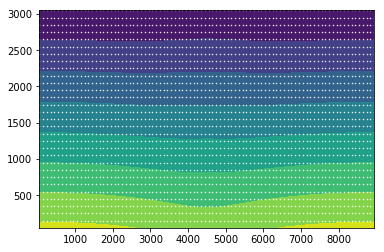

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取数据
# 关注常用的三个参数：comments,delimiter,skiprows
X=np.loadtxt('data/X.txt')
Y=np.loadtxt('data/Y.txt')
T=np.loadtxt('data/T.txt',comments='!')

# 2. 查看数据的维度
# print(X,Y,T)
print(X.shape,Y.shape,T.shape)
XX,YY=np.meshgrid(X,Y)
print(XX.shape,X.shape,T.shape)

# 可视化
plt.figure()
plt.contourf(XX,YY,T)
plt.plot(XX,YY,'.',markersize=1,color='w')
plt.show()

## 4.2 超大文本文件
随意读取某一行，或者读取所有数据

In [35]:
import linecache

linedata=linecache.getline('data/X.txt',3) #getlines

# 结合np.array, .split(), .replace()将读取的文本转换为数字
data=np.array(linedata.replace(' \n','').split(' '),dtype=float)

linecache.clearcache()

## 4.3 h5

['BoundaryPolygon_ptID', 'EL2NOD', 'GCOORD', 'PhaseID', 'PointID']
(37319, 3)


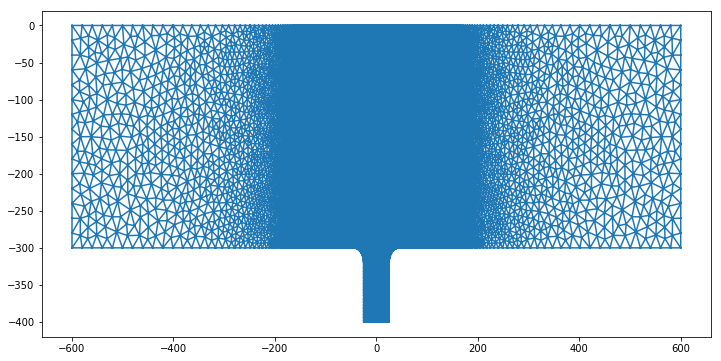

In [41]:
import h5py

# 1. 打开h5文件
MESH=h5py.File('data/MESH.h5','r')

# 2. 查看h5文件里面的数据条目
keys=list(MESH.keys())
print(keys)

# 3. 获取某个条目对应的数据
XYZ=MESH['GCOORD'].value
print(XYZ.shape)

triang=MESH['EL2NOD'].value
triang=triang.reshape(-1,4)
triang=triang[:,1:4]

# 4. 画图 （非结构化数据可视化：第三章第二节讲解）
plt.figure(figsize=(12,6))
plt.triplot(XYZ[:,0],XYZ[:,1],triang)
plt.show()

## 4.4 Matlab
matlab的.mat文件

(2, 37319) (3, 74044)


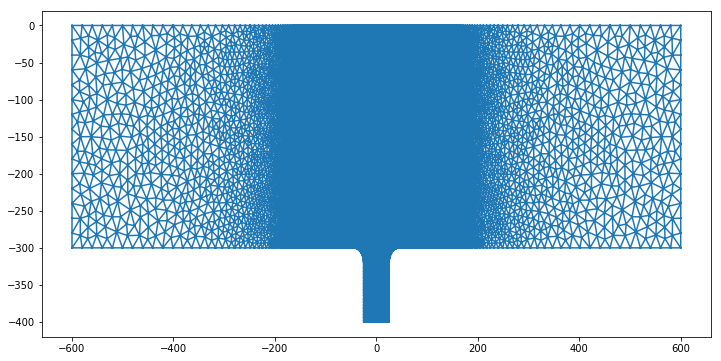

In [47]:
import scipy.io as sio

# 1. 打开.mat文件
data = sio.loadmat('data/MESH.mat')

# 2. 查看变量名
# print(data)
MESH=data['MESH']

# 3. 提取变量数据
XYZ=MESH['GCOORD'][0][0]
triang=MESH['EL2NOD'][0][0]
print(XYZ.shape,triang.shape)

# 4. 可视化
triang=np.rot90(triang)-1  #注意matlab的索引是从1开始的，而python是从0开始的
plt.figure(figsize=(12,6))
plt.triplot(XYZ[0,:],XYZ[1,:],triang)
plt.show()

## 4.5 pandas
csv,excel

### 4.5.1 CSV

In [48]:
import pandas as pd
vents=pd.read_csv('data/vent_fields_all-2.csv')

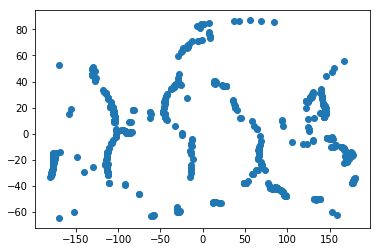

In [51]:
keys=vents.keys()
# print(keys)
lat=vents['Latitude']
lon=vents['Longitude']

plt.figure()
plt.plot(lon,lat,'o') #第三章第一节讲解地图及底图上的数据可视化
plt.show()

### 4.5.2 Excel

In [53]:
vf=pd.read_excel('data/vent_fields_all-2.xlsx')

In [56]:
# print(vf.columns)
# print(vf['Longitude'])

## 4.6 netCDF

In [57]:
from netCDF4 import Dataset

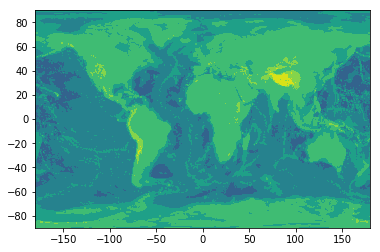

In [65]:
# 1. 打开netCDF文件
etopo=Dataset('data/ETOPO20.nc',mode='r')

# 2. 查看nc文件中的变量
# print(etopo.variables)

# 3. 根据变量名获取变量数值
lon=etopo.variables['lon'][:]
lat=etopo.variables['lat'][:]
z=etopo.variables['z'][:]

# 4. 可视化（简单演示）
lon,lat=np.meshgrid(lon,lat)
# print(lon.shape,lat.shape,z.shape)
plt.figure()
plt.contourf(lon,lat,z)   #第三章第一节详细讲解
plt.show()

# 5. 关闭文件
etopo.close()

## 4.7 gmsh等其他mesh文件格式
这里以meshio为例进行介绍如何读取gmsh文件

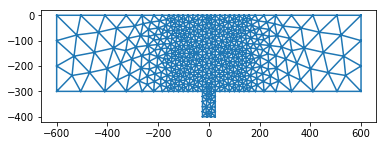

In [72]:
import meshio
# pip install meshio 

# 1. 读取gmsh文件
mesh=meshio.read('data/mesh.msh')

# 2. 查看数据信息
# print(mesh)
# 2.1 获取节点坐标
XYZ=mesh.points
# 2.2 获取网格单元数据
cells=mesh.cells
# print(cells)
# 2.3 从网格单元中获取三角形链接信息
triang=cells['triangle']
# print(triang)

# 可视化
plt.figure()
plt.triplot(XYZ[:,0],XYZ[:,1],triang)
plt.axis('scaled')
plt.show()